# Data Exploration: Portfolio 5 @AstonML:   Mehdi Hmidi

BankSim data presents a table of transactions, transaction attributes (e.g. customer age, customer gender, ZIP code, merchant, purchase category, amount, etc.), and whether or not a transaction is fraudulent (0/1). 

## Fetching Data ...

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('bs140513_032310.csv', names= ['step','customer','age','gender','zipcodeOri','merchant','zipMerchant','category','amount','fraud'])
data = data.iloc[1:]
data.head(10)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (0,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
1,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
2,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
3,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
4,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
5,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [2]:
data.shape

(594643, 10)

### The Dataset has 594,643 Rows and 10 Columns.

In [3]:
data.dtypes

step           object
customer       object
age            object
gender         object
zipcodeOri     object
merchant       object
zipMerchant    object
category       object
amount         object
fraud          object
dtype: object

### During the exploration of the data I notice that some values are marked with 'U'.

Let's understand the columns better

    step: simulation days(6 months).
    
    customer: customer id.
    
    age: categorized age.

            0: less than 18,
            1: 19-25,
            2: 26-35,
            3: 36-45,
            4: 46-55,
            5: 56-65,
            6: more than 65
            U: Unknown (only for transactions by gender Enterprise)

    gender: customer's gender.

            E: Enterprise,
            F: Woman,
            M: Man,
            U: Unknown

    zipcodeOri:  zip code origin.

    merchant: merchant id.

    zipMerchant: merchant zipcode.
    
    category: purchase category.

    amount:  purchase amount.
    
    fraud: boolean fraudulent value (1)=> yes or (0)=> no.


## Basic Analysis:

###  Perform a check for null values:

In [4]:
data.isnull().values.any()

False

> logical since it is a synthetic dataset.
### Attempt Descriptive statistics

In [5]:
data.describe()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
count,594643,594643,594643,594643,594643,594643,594643,594643,594643.00,594643
unique,181,4112,8,4,1,50,1,15,33154.00,4
top,175,'C1978250683','2','F','28007','M1823072687','28007','es_transportation',26.67,0
freq,3774,265,187310,324565,594643,299693,594643,505119,135.00,522898


### Notice:
#### (1) "zipcodeOri" and "zipMerchant" columns provide one unique value for all rows.
> Hence they are not necesssary moving forward.
#### (2) Value are within apostrophes
> Let's strip them from the values

In [6]:
data = data.drop(["zipcodeOri"], axis = 1)
data = data.drop(["zipMerchant"], axis = 1)

data["customer"] = data["customer"].str.replace('[^\w\s]','')
data["age"] = data["age"].str.replace('[^\w\s]','')
data["gender"] = data["gender"].str.replace('[^\w\s]','')
data["merchant"] = data["merchant"].str.replace('[^\w\s]','')
data["category"] = data["category"].str.replace('[^\w\s]','')

data["step"] = data["step"].astype("category")
data["customer"] = data["customer"].astype("category")
data["age"] = data["age"].astype("category")
data["gender"] = data["gender"].astype("category")
data["merchant"] = data["merchant"].astype("category")
data["category"] = data["category"].astype("category")
data["amount"] = data["amount"].astype(float)
data["fraud"] = data["fraud"].astype("category")

data.head()

,step,customer,age,gender,merchant,category,amount,fraud
1,0,C1093826151,4,M,M348934600,es_transportation,4.55,0
2,0,C352968107,2,M,M348934600,es_transportation,39.68,0
3,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0
4,0,C1760612790,3,M,M348934600,es_transportation,17.25,0
5,0,C757503768,5,M,M348934600,es_transportation,35.72,0


### Let's check the "fraud" categories 

In [7]:
pd.unique(data['fraud'])

[0, 1, 0, 1]
Categories (4, object): [0, 1, 0, 1]

In [8]:
data["fraud"]= pd.factorize(data.fraud)[0] % 2
pd.unique(data['fraud'])

array([0, 1])

### Let's visualize the distribution of "fraud" in the data

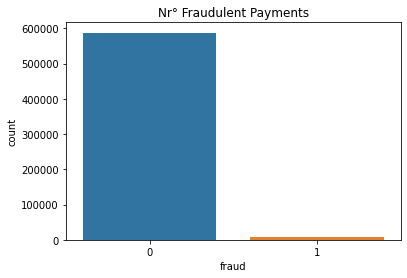

Legal transactions:  587443
Fraudulent transactions:  7200

Percentage of Fraud is: 1.2108105199254007


In [9]:
fraud = data.loc[data.fraud == 1] 
legal = data.loc[data.fraud == 0]

sns.countplot(x="fraud",data=data, order = data["fraud"].value_counts().index)
plt.title("Nr° Fraudulent Payments")
plt.show()

print("Legal transactions: ", legal.fraud.count())
print("Fraudulent transactions: ", fraud.fraud.count())

print("\nPercentage of Fraud is:",100*fraud.fraud.count()/data.fraud.count())

### Let's measure the symmetry of the distribution

In [10]:
data.skew()

step      -0.119428
amount    32.365838
fraud      8.921993
dtype: float64

####  The data are highly skewed

>This could lead a possible ML algo to ignore the fraudulant class for example. Such probelmatic imbalance must be resolved. 

## Let's analyze more before making a decision.
### First: Let's explore the Skewness of "amount" data
A Kernel density estimation plot is useful to visualize the “shape” of the "amount" data

[(0.0, 0.006), (0.0, 1000.0)]

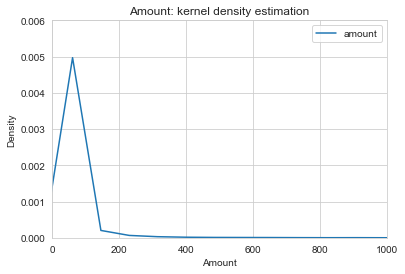

In [11]:
sns.set_style('whitegrid')
plt.title("Amount: kernel density estimation")
plt.xlabel("Amount")
plt.ylabel("Density")
sns.kdeplot(data["amount"]).set(xlim=(0,1000),ylim=(0,.006)) #bw parameter stands for bandwidth. i.e. how smooth you want the densityPlt

#### This demonstrates a positive skeweness ( Most payment amounts are under 100)
> One must remember to normalize this as to avoid incorrect future estimates.

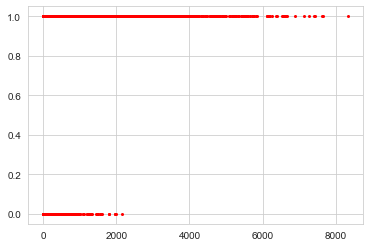

In [12]:
plt.figure(1)
plt.plot(data["amount"], data["fraud"], 'ro', markersize=2)
plt.show()

#### Observation:
> "Fraud" is more and moren likely on high transaction amounts 

> It could be useful to segregate the "amount" dimension into intervals

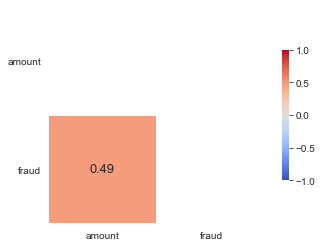

In [13]:
import numpy as np
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots()
heatmap = sns.heatmap(corr, mask = mask,square = True, linewidths = 1,
                      cmap = 'coolwarm', cbar_kws = {'shrink': .6,'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, vmax = 1, annot = True, annot_kws = {'size': 13})
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns, rotation = 0)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#### Observation:
 >  "Amount" and "Fraud" demonstrate a low correlation

### Second: Let's explore the rest of the columns

In [14]:
print('\n\tNumber of transactions per category\n')
print(data['category'].value_counts())
print('\n\tMean values per category\n')
print(data.groupby("category")["amount","fraud"].mean().sort_values(by='fraud'))


	Number of transactions per category

es_transportation        505119
es_food                   26254
es_health                 16133
es_wellnessandbeauty      15086
es_fashion                 6454
es_barsandrestaurants      6373
es_hyper                   6098
es_sportsandtoys           4002
es_tech                    2370
es_home                    1986
es_hotelservices           1744
es_otherservices            912
es_contents                 885
es_travel                   728
es_leisure                  499
Name: category, dtype: int64

	Mean values per category

                            amount     fraud
category                                    
es_contents              44.547571  0.000000
es_food                  37.070405  0.000000
es_transportation        26.958187  0.000000
es_fashion               65.666642  0.017973
es_barsandrestaurants    43.461014  0.018829
es_hyper                 45.970421  0.045917
es_wellnessandbeauty     65.511221  0.047594
es_tech            

<ipython-input-14-3224fcabdf6e>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby("category")["amount","fraud"].mean().sort_values(by='fraud'))


#### Observation: 
>"es_transportation" covers the crushing majority of transactions.

>"es_leisure" and "es_travel" cover the least number of transactions


   >"es_leisure" and "es_travel" are the categories most likely to have a fraudulent transaction (also highest amounts)
   
   > "es_transportation" "es_contents" and "es_food" have 0 fraud percentage.


### How does "age" relate to "amount" and "fraud" ?


	Amount spent by age



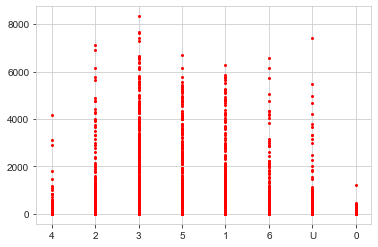

2    187310
3    147131
4    109025
5     62642
1     58131
6     26774
0      2452
U      1178
Name: age, dtype: int64

Percentage of fraud by age group


,age,fraud
7,U,0.594228
6,6,0.974826
5,5,1.095112
1,1,1.185254
3,3,1.192815
2,2,1.251401
4,4,1.293281
0,0,1.957586


In [15]:
print("\n\tAmount spent by age\n")
plt.figure(1)
plt.plot(data["age"], data["amount"], 'ro', markersize=2)
plt.show()
print(data['age'].value_counts())
print("\nPercentage of fraud by age group")
(data.groupby('age')['fraud'].mean()*100).reset_index().sort_values(by='fraud')

#### Observation
> Most transactions are done by age group "2"

> age group "3" executes more expensive transactions

> Highest percentage of fraud occurs more in ages equal and below 18 => category 0

### How does "gender" relate to "fraud"?

Number of transactions by gender

F    324565
M    268385
E      1178
U       515
Name: gender, dtype: int64


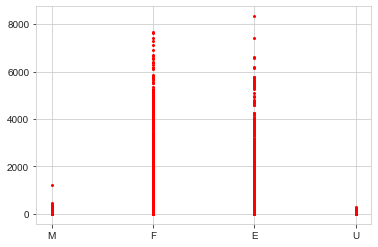


Percentage of fraud by gender
gender
E    0.594228
F    1.465962
M    0.907279
U    0.000000
Name: fraud, dtype: float64


In [16]:
print("Number of transactions by gender\n")
print(data['gender'].value_counts())
plt.plot(data["gender"], data["amount"], 'ro', markersize=2)
plt.show()
print("\nPercentage of fraud by gender")
print(data.groupby('gender')['fraud'].mean()*100)

#### Observation:
> Most fraudulent transactions are done to Females that spend more on average

 ### How does "Merchants" relate to "Fraud" transactions?

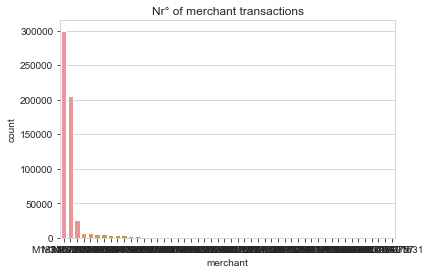

                  amount     fraud
merchant                          
M1053599405   103.072322  0.000000
M85975013      37.070405  0.000000
M677738360     44.479832  0.000000
M45060432     103.027016  0.000000
M349281107     61.932704  0.000000
M348934600     26.965542  0.000000
M97925176      56.637796  0.000000
M1913465890   104.441660  0.000000
M1872033263   114.769143  0.000000
M1842530320    99.586671  0.000000
M1823072687    26.953146  0.000000
M1788569036    94.689779  0.000000
M1726401631   855.920000  0.000000
M1946091778    57.067848  0.000000
M1313686961    44.593586  0.000000
M1352454843   109.981324  0.000000
M117188757    105.102381  0.000000
M1600850729    63.088700  0.000000
M1400236507   116.117758  0.000000
M1416436880    91.267818  0.000000
M692898500    110.711333  0.017778
M151143676     43.461014  0.018829
M78078399      63.075243  0.027363
M209847108     62.391623  0.027792
M855959430     45.970421  0.045917
M50039827     120.503755  0.050218
M1535107174    74.73

<ipython-input-17-0ffde4399469>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby("merchant")["amount","fraud"].mean().sort_values(by='fraud'))


In [17]:
sns.countplot(x="merchant",data=data, order = data["merchant"].value_counts().index)
plt.title("Nr° of merchant transactions")
plt.show()
print(data.groupby("merchant")["amount","fraud"].mean().sort_values(by='fraud'))

#### Observation:
> "M1823072687" and "M348934600" have the highest number of transactions > 20K.

> "M1823072687" and "M348934600" have 0 fraudulent transactions as many others.

> Certain merchants (11 or so) have a HIGH percentage of fraudulent transactions.

 ### How does "Customer" relate to "Fraud" transactions?

In [18]:
print("Number of transactions by customer\n")
print(data['customer'].value_counts())

print("\n>>>Percentage of fraud by customer\n")
data.groupby("customer")["amount","fraud"].mean().sort_values(by='fraud')

Number of transactions by customer

C1978250683    265
C1275518867    252
C806399525     237
C515668508     205
C1338396147    195
              ... 
C1156745710      6
C1345586046      6
C1809646275      5
C1743702978      5
C1404665203      5
Name: customer, Length: 4112, dtype: int64

>>>Percentage of fraud by customer



<ipython-input-18-9ea246220a29>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby("customer")["amount","fraud"].mean().sort_values(by='fraud')


,amount,fraud
customer,,
C1948728559,30.131520,0.000000
C1862556322,34.696012,0.000000
C1864289868,30.017861,0.000000
C619451848,37.075741,0.000000
C617323407,27.102701,0.000000
...,...,...
C617723960,517.910217,0.869565
C1572610482,581.060693,0.881188
C381007057,513.888700,0.890000


#### Observation:
> Certain customers have HIGH percentage of fraudulent transactions.


>>>>> Continue to (ML predictions)